<a href="https://colab.research.google.com/github/kauarodriguessss/ponderadaColab/blob/main/Ponderada2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorador de Labirintos: Pilhas e Filas**
Atividade ponderada - Semana 7
*   Nome: Kauã Rodrigues dos Santos
*   Curso: Engenharia de Software
*   Turma: 13


---


Nesta atividade, desenvolvemos um **robô explorador** que atravessa um labirinto, coletando chaves e abrindo portas até encontrar a saída.

O objetivo é utilizar **estruturas de dados essenciais**, como:

- **Pilha (LIFO)** para armazenar os movimentos do robô.
- **Fila (FIFO)** para gerenciar as chaves e abrir portas na ordem correta.


## **Importação de Bibliotecas**
As bibliotecas utilizadas neste projeto são:

*   collections: Para implementar a fila de chaves.
*   matplotlib.pyplot: Para visualizar o labirinto e a movimentação do robô.
*   numpy: Para facilitar a manipulação de matrizes de cores.
*   time: Para adicionar pausas e simular a movimentação do robô.

🔽 Agora, vou importar as bibliotecas no bloco abaixo:

In [ ]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import time

## **Definição dos Elementos do Labirinto**

Cada elemento do labirinto é representado por um caractere:

- `X` → Parede (o robô não pode atravessar).
- `.` → Caminho livre.
- `K` → Chave (o robô precisa coletar para abrir portas).
- `D` → Porta trancada (só abre se o robô tiver uma chave).
- `S` → Saída (objetivo final do robô).
- `R` → Posição inicial do robô.

🔽 No próximo bloco, defini esses elementos:

In [ ]:
PAREDE = 'X'
CAMINHO = '.'
CHAVE = 'K'
PORTA = 'D'
SAIDA = 'S'
ROBO = 'R'

## **Estrutura do Labirinto**

O labirinto é representado como uma **matriz (lista de listas)**, onde cada célula contém um dos elementos definidos acima.

🔽 Criei um exemplo de labirinto no bloco abaixo:

In [ ]:
# Bloco 3: Representação do labirinto
labirinto = [
    ['X', 'X', 'X', 'X', 'X', 'X', 'X'],
    ['X', 'R', '.', 'K', 'D', '.', 'X'],
    ['X', 'X', 'X', '.', 'X', '.', 'X'],
    ['X', '.', '.', '.', 'X', 'S', 'X'],
    ['X', 'X', 'X', 'X', 'X', 'X', 'X']
]

## **Movimentação do Robô**

O robô pode se mover nas seguintes direções:

- ➡️ **Direita** `(0,1)`  
- ⬇️ **Baixo** `(1,0)`  
- ⬅️ **Esquerda** `(0,-1)`  
- ⬆️ **Cima** `(-1,0)`  

Esses movimentos serão usados para explorar o labirinto.

🔽 Defini abaixo:

In [ ]:
movimentos = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Direita, Baixo, Esquerda, Cima

## **Encontrando a Posição Inicial do Robô**

Para que o robô saiba onde começar, implementamos uma função que percorre o labirinto e identifica a posição do `R`.

🔽 No próximo bloco, implementei essa função:

In [ ]:
def encontrar_posicao(labirinto, elemento):
    for i, linha in enumerate(labirinto):
        for j, valor in enumerate(linha):
            if valor == elemento:
                return (i, j)
    return None

## **Visualização do Labirinto**

Para facilitar a compreensão, usamos a biblioteca `matplotlib` para exibir o labirinto de forma gráfica.

Cada elemento tem uma cor específica:

- **Paredes (X)** → Preto  
- **Saída (S)** → Verde  
- **Chaves (K)** → Laranja  
- **Portas (D)** → Azul  
- **Robô (R)** → Roxo  

🔽 No próximo bloco, implementei essa visualização:

In [ ]:
# Bloco 6: Função para visualizar o labirinto
def exibir_labirinto(labirinto):
    plt.clf()

    # Define cores específicas para cada elemento
    color_map = {
        'X': [0, 0, 0],   # Preto para paredes
        '.': [1, 1, 1],   # Branco para caminhos livres
        'R': [0.5, 0, 0.5], # Roxo para o robô
        'K': [1, 0.6, 0],   # Laranja para chaves
        'D': [0, 0, 1],   # Azul para portas
        'S': [0, 1, 0]    # Verde para a saída
    }

    # Criar a matriz de cores com base no labirinto
    img = np.array([[color_map[cell] if cell in color_map else [1, 1, 1] for cell in row] for row in labirinto])

    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

## **Algoritmo de Exploração do Robô**

O robô segue as seguintes regras:

✅ Move-se para a **próxima posição disponível**.  
✅ **Coleta chaves** ao encontrá-las.  
✅ **Usa chaves na ordem correta** ao encontrar portas.  
✅ **Não faz backtracking (não volta para trás)**.  
✅ **Para** se não conseguir avançar.  

🔽 No próximo bloco, é toda a lógica por trás da implementação do algoritmo de exploração:


In [ ]:
# Bloco 7: Implementação da exploração do labirinto
def explorar_labirinto(labirinto):
    robo_pos = encontrar_posicao(labirinto, ROBO)
    fila_chaves = collections.deque()  # Fila para armazenar chaves (FIFO)
    visitados = set()
    x, y = robo_pos

    while labirinto[x][y] != SAIDA:
        print(f"Posição atual: ({x}, {y})")
        visitados.add((x, y))
        melhor_movimento = None

        for dx, dy in movimentos:
            nx, ny = x + dx, y + dy
            if (0 <= nx < len(labirinto) and 0 <= ny < len(labirinto[0]) and
                (nx, ny) not in visitados and labirinto[nx][ny] != PAREDE):
                melhor_movimento = (nx, ny)
                break

        if melhor_movimento:
            labirinto[x][y] = CAMINHO
            x, y = melhor_movimento

            if labirinto[x][y] == CHAVE:
                print("Chave encontrada! Armazenando na fila...")
                fila_chaves.append('chave')
                labirinto[x][y] = CAMINHO

            elif labirinto[x][y] == PORTA:
                if fila_chaves:
                    print("Porta encontrada! Usando chave...")
                    fila_chaves.popleft()
                    labirinto[x][y] = CAMINHO
                else:
                    print("Porta trancada! Robô parou!")
                    return False

            labirinto[x][y] = ROBO
        else:
            print("Robô não pode mais se mover. Parando.")
            return False

        time.sleep(0.5)
        exibir_labirinto(labirinto)

    print("Robô chegou à saída!")
    return True

## **Executando a Simulação**

Agora que tudo está pronto, iniciamos a simulação. O robô começará na posição `R` e tentará alcançar a saída `S`, coletando chaves `K` e abrindo portas `D` pelo caminho.

🔽 Execute o bloco abaixo para iniciar a exploração:

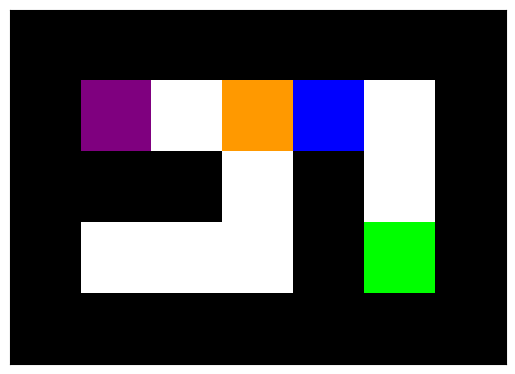

Posição atual: (1, 1)


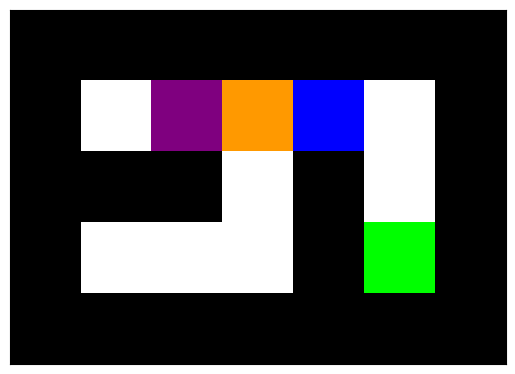

Posição atual: (1, 2)
Chave encontrada! Armazenando na fila...


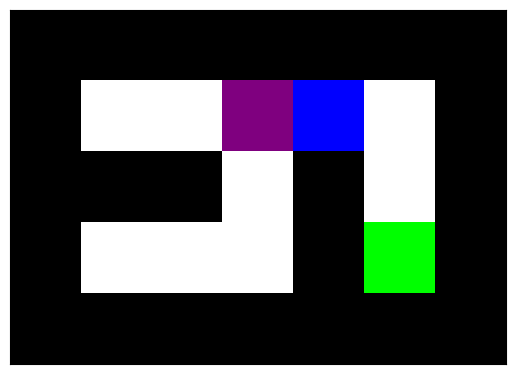

Posição atual: (1, 3)
Porta encontrada! Usando chave...


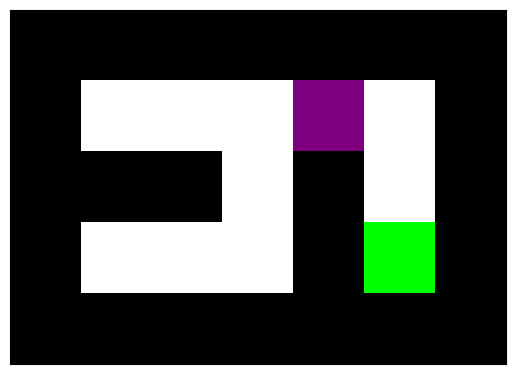

Posição atual: (1, 4)


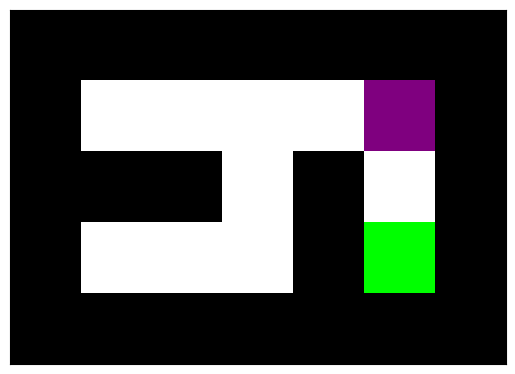

Posição atual: (1, 5)


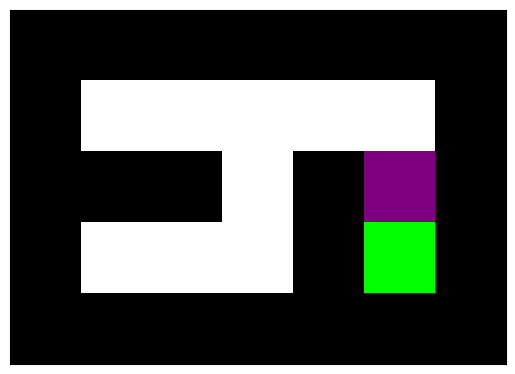

Posição atual: (2, 5)


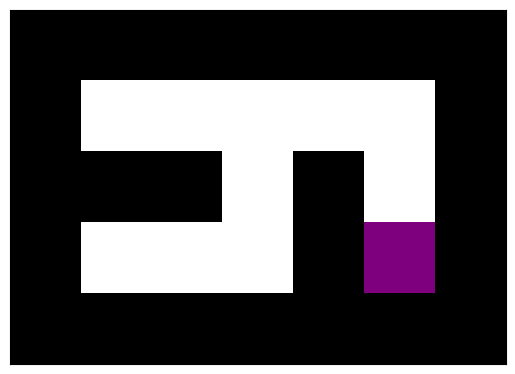

Posição atual: (3, 5)
Robô não pode mais se mover. Parando.


False

In [ ]:
#Bloco 8: Executando a exploração do labirinto
exibir_labirinto(labirinto)
explorar_labirinto(labirinto)

## **Conclusão**

Com essa atividade, consegui implementar um robô explorador de labirinto utilizando estruturas de dados fundamentais:

- **Pilha (LIFO)**: Inicialmente usada para backtracking, mas removida para tornar a navegação mais simples.
- **Fila (FIFO)**: Garante que as chaves sejam usadas na ordem correta.
- **Controle de fluxo eficiente**: O robô navega pelo labirinto e para ao encontrar bloqueios.

Além disso, apliquei técnicas de visualização de dados para tornar o processo mais interativo e intuitivo.